#### Context
This dataset comes from a proof-of-concept study published in 1999 by Golub et al. It showed how new cases of cancer could be classified by gene expression monitoring (via DNA microarray) and thereby provided a general approach for identifying new cancer classes and assigning tumors to known classes. These data were used to classify patients with acute myeloid leukemia (AML) and acute lymphoblastic leukemia (ALL).

#### Content
Golub et al "Molecular Classification of Cancer: Class Discovery and Class Prediction by Gene Expression Monitoring"

There are two datasets containing the initial (training, 38 samples) and independent (test, 34 samples) datasets used in the paper. These datasets contain measurements corresponding to ALL and AML samples from Bone Marrow and Peripheral Blood. Intensity values have been re-scaled such that overall intensities for each chip are equivalent.

#### Acknowledgements
Molecular Classification of Cancer: Class Discovery and Class Prediction by Gene Expression

Science 286:531-537. (1999). Published: 1999.10.14

T.R. Golub, D.K. Slonim, P. Tamayo, C. Huard, M. Gaasenbeek, J.P. Mesirov, H. Coller, M. Loh, J.R. Downing, M.A. Caligiuri, C.D. Bloomfield, and E.S. Lander

These datasets have been converted to a comma separated value files (CSV)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
labels = pd.read_csv(r"C:\Users\raobr\Documents\Project Files\Notebooks and Datasets\Gene Expression PCA\gene-expression\actual.csv", index_col = 'patient')
test = pd.read_csv(r"C:\Users\raobr\Documents\Project Files\Notebooks and Datasets\Gene Expression PCA\gene-expression\data_set_ALL_AML_independent.csv")
train = pd.read_csv(r"C:\Users\raobr\Documents\Project Files\Notebooks and Datasets\Gene Expression PCA\gene-expression\data_set_ALL_AML_train.csv")
train.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


### Data Cleaning and Preparation

In [3]:
cols = [col for col in test.columns if 'call' in col]
test = test.drop(cols, 1)

cols = [col for col in train.columns if 'call' in col]
train = train.drop(cols, 1)

train.head()

,Gene Description,Gene Accession Number,1,2,3,4,5,6,7,8,...,35,36,37,38,28,29,30,31,32,33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,...,7,-213,-25,-72,-4,15,-318,-32,-124,-135
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,...,-100,-252,-20,-139,-116,-114,-192,-49,-79,-186
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,...,-57,136,124,-1,-125,2,-95,49,-37,-70
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,...,132,318,325,392,241,193,312,230,330,337
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,...,-377,-209,-396,-324,-191,-51,-139,-367,-188,-407


In [4]:
train = train.T
test = test.T
train.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41


In [5]:
train = train.drop(['Gene Description', 'Gene Accession Number'])
test = test.drop(['Gene Description', 'Gene Accession Number'])

train.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


In [6]:
labels = labels.replace({'ALL':0,'AML':1})
labels_train = labels[labels.index <= 38]
labels_test = labels[labels.index > 38]

train = train.replace(np.inf, np.nan)
train = train.fillna(value = train.values.mean())

test = test.replace(np.inf, np.nan)
test = test.fillna(value = test.values.mean())

In [7]:
df_all = train.append(test, ignore_index=True)

### Data Preprocessing and Dimensionality Reduction (PCA)

In [21]:
from sklearn import preprocessing
X_all = preprocessing.StandardScaler().fit_transform(df_all)
from sklearn.decomposition import PCA
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X_all)
print(X_pca.shape)

(72, 50)


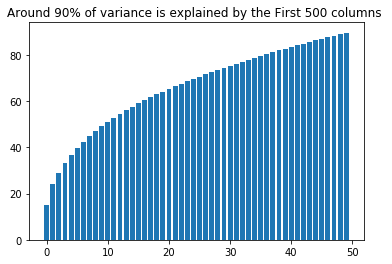

In [22]:
cum_sum = pca.explained_variance_ratio_.cumsum()
cum_sum = cum_sum*100

plt.bar(range(50), cum_sum)
plt.title("Around 90% of variance is explained by the First 500 columns ");